Importaremos las librerias de pandas y a su vez las de numpy y matplotlib para usar mas en el futuro y graficaremos los datos con un scatter para ver la dispersion de estos mismos.

Analizando la base de datos en el csv los datos finales presentan anomalias como letras, espacios en blanco o simbolos especiales, por lo que hay que remplazar todos esos valores por 0 ya que son lo que significan en su mayoria con relacion al tiempo que muestran.

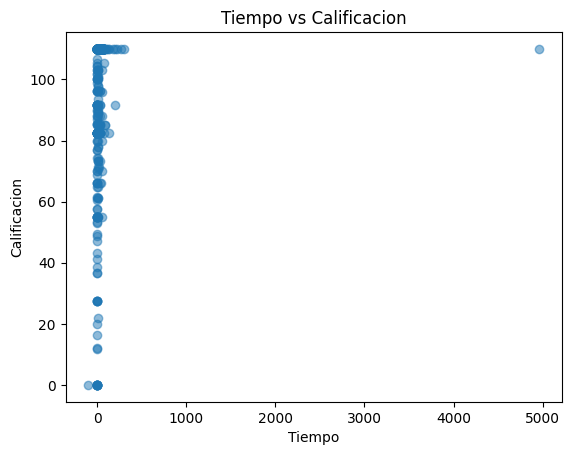

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos = pd.read_csv("A1.6-Tiempo-de-Entrega.csv")
plt.scatter(datos.Tiempo, datos.Calificacion, alpha=0.5)
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.title('Tiempo vs Calificacion')
plt.show()


Debido a que la grafiica sale como un solo punto hace que se modifique buscaremos los valores atipicos de nuestra variable tiempo con uun K=3 y decidiremos si los eliminamos o no.

In [191]:
import numpy as np
q1=datos.Tiempo.quantile(0.25)
q3=datos.Tiempo.quantile(0.75)
iqr=q3-q1
li=q1-(3*iqr)
ls=q3+(3*iqr)
out=np.where((datos.Tiempo<=li) | (datos.Tiempo>=ls))[0]
print(datos.iloc[out,:])

          Tiempo  Calificacion
0      85.076389      85.00000
1      84.675556      85.00000
2      79.553889     110.00000
3      75.310556     110.00000
4      64.958611     110.00000
5      58.157778     110.00000
6      56.238611     110.00000
7      55.903056     110.00000
8      52.465556     103.00000
9      51.998333      96.00000
27     76.101944     110.00000
28     65.141667     110.00000
29   4960.167000     110.00000
54    124.434722     110.00000
55     82.725278     110.00000
56     79.490278     110.00000
57     77.231111     110.00000
58     57.590556     110.00000
59     54.765833     110.00000
81    132.637500     110.00000
82     54.129444      80.00000
83     52.095833      70.00000
84     50.952500     110.00000
107  -100.000000       0.00000
108   177.090000     110.00000
109    79.073889     110.00000
110    61.739722     110.00000
111    52.792222      55.00000
135   299.986667     110.00000
136   220.310833     110.00000
137   202.196111      91.66666
138   19

Despues de ver los valores atipicos decidiremos eleminarlos, puesto a solamente la filas 29 y 107 que tienen valores demaciado atipicos, los demas los dejaremos ya que aunque sean muy grandes, esto es lo que queremos analizar, si estos alumnos que entregaron la tarea con bastante tiempo de anticipacion son mejor que los que entregaron a ultimo minuto.

Despues volveremos a graficar para ver como quedo la grafica sin estos 2 valores atipicos.

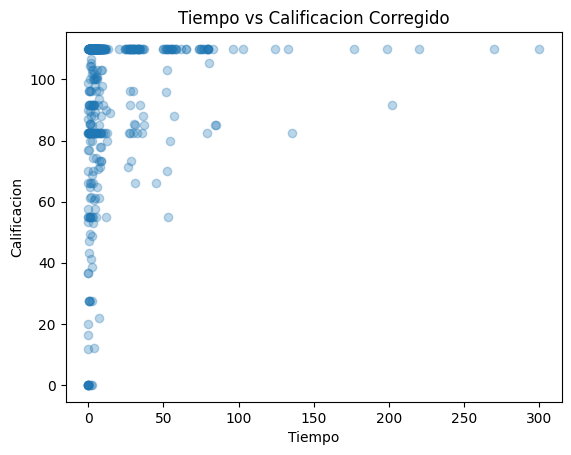

Considero que una buena forma de prediccion para estos datos seria la polinomial, 
puesto que tal vez la curvatura se ajuste perfectamente


In [192]:
datos = datos.drop(29)
datos = datos.drop(107)

plt.scatter(datos.Tiempo, datos.Calificacion, alpha=0.3)
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.title('Tiempo vs Calificacion Corregido')
plt.show()

print("Considero que una buena forma de prediccion para estos datos seria la polinomial, ")
print("puesto que tal vez la curvatura se ajuste perfectamente")

Separa los datos en entrenamiento y prueba, con una relación de 70/30. Imprime en consola el promedio de los tiempos en el conjunto de entrenamiento y en el conjunto de prueba. Haz lo mismo para las calificaciones. Incluye una línea de texto donde comentes sobre la similitud o diferencia de los valores promedio entre el conjunto de entrenamiento y el de validación, y cómo es que esto podría afectar al análisis.

In [193]:
from sklearn.model_selection import train_test_split
X_trainT, X_testT, Y_trainT, Y_testT = train_test_split(datos.Tiempo, datos.Calificacion, train_size = 0.7)
print("Tamaño de la base de datos: ",datos.shape)

print("\nTiempo promedio de entrenamiento: ",np.mean(X_trainT))
print("Tiempo promedio de prueba: ",np.mean(X_testT))
print("\nCalificaciones promedio de entrenamiento: ",np.mean(Y_trainT))
print("Calificaciones promedio de prueba: ",np.mean(Y_testT))


print("")

Tamaño de la base de datos:  (430, 2)

Tiempo promedio de entrenamiento:  17.686267072790695
Tiempo promedio de prueba:  17.709381997813953

Calificaciones promedio de entrenamiento:  94.4982892026578
Calificaciones promedio de prueba:  93.12111108527131



Importaremos la libreia statsmodels para poder obtener todos los valores deseados de una forma mas rapida, a su ves cambiaremos la forma del arreglo, los datos de entrenamiento, transformaremos los datos con la función transform y los convertiremos a un data frame de pandas.

Posteriormente para podeer graficar esta prediccion con la ecuacion de yHat.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6.583
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           7.95e-06
Time:                        00:56:04   Log-Likelihood:                -1380.7
No. Observations:                 301   AIC:                             2773.
Df Residuals:                     295   BIC:                             2796.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             84.4831      2.269     37.230      0.0

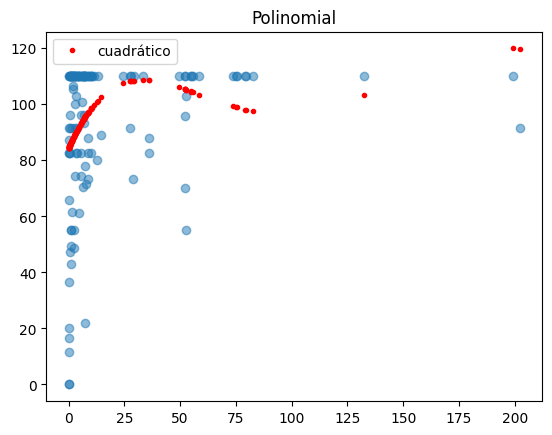


Se podria decir tanto que a menor tiempo mayor calificacion, como a menor tiempo menor calificacion
esto debido que tiene tantos coeficientes negativos como positivos, en la mayoria siendo positivos
lo que nos indica que aunque sea un poco inexacto mientras aumenta el tiempo, mas califaciones de aprobatorias hay
esto tambien lo tomamos en cuenta ua que las variables si son significatvas aunque las mas significativas, son positivas


In [194]:
import statsmodels.api as sm
Xtiemp_train = X_trainT.array.reshape(-1,1)
Xtiemp_test = X_testT.array.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures
polyq_train = PolynomialFeatures(degree=5).fit(Xtiemp_train)
polyq_test = PolynomialFeatures(degree=5).fit(Xtiemp_test)
Xq_train = pd.DataFrame(polyq_train.transform(Xtiemp_train))
Xq_test = pd.DataFrame(polyq_test.transform(Xtiemp_test))
mq = sm.OLS(list(Y_trainT),Xq_train).fit()
print(mq.summary())

yHat_mq = mq.predict(Xq_test)

plt.scatter(X_testT,Y_testT, alpha=0.5)
plt.plot(X_testT,yHat_mq,"r.",label="cuadrático")
plt.title('Polinomial')
plt.legend()
plt.show()

print("\nSe podria decir tanto que a menor tiempo mayor calificacion, como a menor tiempo menor calificacion")
print("esto debido que tiene tantos coeficientes negativos como positivos, en la mayoria siendo positivos")
print("lo que nos indica que aunque sea un poco inexacto mientras aumenta el tiempo, mas califaciones de aprobatorias hay")
print("esto tambien lo tomamos en cuenta ua que las variables si son significatvas aunque las mas significativas, son positivas")

Importaremos la libreria mlinsights con la funcion PiecewiseRegressor para asi poder usar la predicoion seecciionada en conjunto del comando bins para separarlos de forma igualitarias y graficaremos.

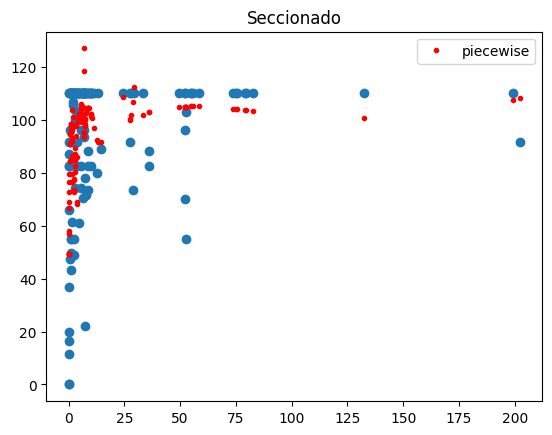

In [195]:
from mlinsights.mlmodel import PiecewiseRegressor
ms = PiecewiseRegressor('bins').fit(Xq_train.iloc[:,1:],Y_trainT)

yHat_ms = ms.predict(Xq_test.iloc[:,1:])

plt.scatter(X_testT,Y_testT)
plt.plot(X_testT,yHat_ms,"r.",label="piecewise")
plt.title('Seccionado')
plt.legend()
plt.show()

Ahora con la funcion KNeighborsRegressor y una K vecinos igual a 22 para su mejor obtimizacion despues de varias pruebas en conjunto con el comando fit realizaremos esta preddicion y graficaremos de la misma forma.

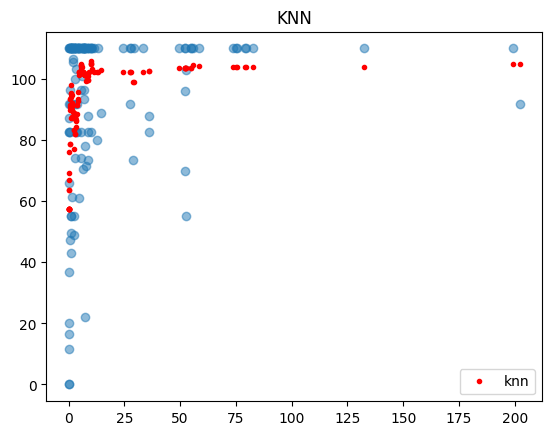

In [196]:
from sklearn.neighbors import KNeighborsRegressor as KNN
mk = KNN(n_neighbors=22).fit(Xtiemp_train,Y_trainT)

yHat_mk = mk.predict(Xtiemp_test)

plt.scatter(X_testT,Y_testT, alpha=0.5)
plt.plot(X_testT,yHat_mk,"r.",label="knn")
plt.title('KNN')
plt.legend()
plt.show()

Ahora con las ecuaciones pasadas de yHat y calcularemos los RSE respectivos de cada prediccion con la ecuacion del RSE y los imprimiremos y compararemos.

In [197]:
yHat_mq = mq.predict(Xq_test)
RSS_mq = sum((list(Y_testT)-yHat_mq)**2)
RSE_mq = np.sqrt(RSS_mq/(len(Y_testT)-1))
print("RSE Polinomio Grado 5:", RSE_mq)

yHat_ms = ms.predict(Xq_test.iloc[:,1:])
RSS_ms = sum((list(Y_testT)-yHat_ms)**2)
RSE_ms = np.sqrt(RSS_ms/(len(Y_testT)-1))
print("\nRSE segmentado en partes iguales:", RSE_ms)

yHat_mk = mk.predict(Xtiemp_test)
RSS_mk = sum((list(Y_testT)-yHat_mk)**2)
RSE_mk = np.sqrt(RSS_mk/(len(Y_testT)-1))
print("\nRSE KNN 22:", RSE_mk)

print("\nViendo las diferentes predicciones con sus respectivos RSE podriamos decir que aproximadamente, ya que los datos cambian")
print("la prediccion de KNN es la mas efectiva pero solo por puntos decimales, asi que un claro ganador no hay ya que las 3")
print("son similares teniendo un aproximado de 23. y basandonos en los datos contra las predicciones yo tambien diria que el KNN")
print("ya que la mayoria de sus datos son muy dispersos y este metodo se centra mas en eso.")

RSE Polinomio Grado 5: 24.8196391716775

RSE segmentado en partes iguales: 22.940042592535704

RSE KNN 22: 22.74285784690798

Viendo las diferentes predicciones con sus respectivos RSE podriamos decir que aproximadamente, ya que los datos cambian
la prediccion de KNN es la mas efectiva pero solo por puntos decimales, asi que un claro ganador no hay ya que las 3
son similares teniendo un aproximado de 23. y basandonos en los datos contra las predicciones yo tambien diria que el KNN
ya que la mayoria de sus datos son muy dispersos y este metodo se centra mas en eso.


Ahora graficaremos las 3 predicciones anteriores para que se muestren en una sola grafica con diferentes colores cada una. Para todo esto tendremos qque tener una nueva yHat que comparre los datos de entrenamiento contra los de validacion de las calificaciones

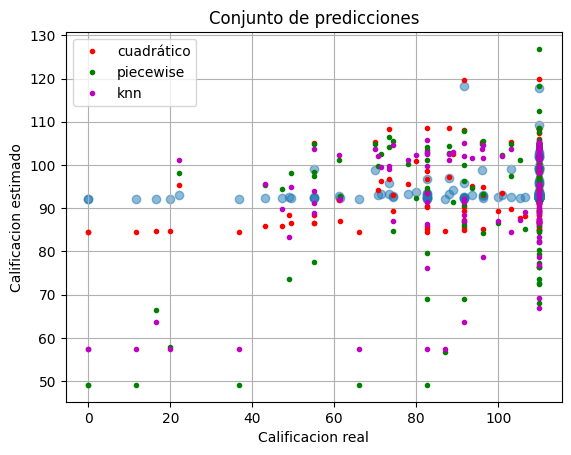

In [198]:
import statsmodels.api as sm
X_train_array = np.asarray(X_trainT, dtype=float)
Y_train_array = np.asarray(Y_trainT, dtype=float)
model = sm.OLS(Y_train_array,sm.add_constant(X_train_array))
results = model.fit()

yHatTotal=results.predict(sm.add_constant(X_testT))

plt.grid(True)
plt.xlabel("Calificacion real")
plt.ylabel("Calificacion estimado")
plt.scatter(Y_testT,yHatTotal, alpha=0.5)
plt.plot(Y_testT,yHat_mq,"r.",label="cuadrático")
plt.plot(Y_testT,yHat_ms,"g.",label="piecewise")
plt.plot(Y_testT,yHat_mk,"m.",label="knn")
plt.title('Conjunto de predicciones')
plt.legend()
plt.show()

Con todo esto, podriamos decir que rechazamos la hipotesis de que a menor tiempo menor calificacion, puesto a que hay un error que aunque no sea tan grande si importa y a su vez hay tantos datos que indican que si se cumple esta hipotesis como tantos otros datos que no se cumplen.